In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

path = "/content/drive/MyDrive/NLP/Report/Electronics_5.json"
df = pd.read_json(path, lines=True, nrows=200000)

df = df[['reviewText', 'overall']].dropna()
df.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1


In [3]:
df.isnull().sum()

,0
reviewText,0
overall,0


In [4]:
df['overall'].value_counts().sort_index()

,count
overall,
1,13528
2,9672
3,15851
4,40852
5,120097


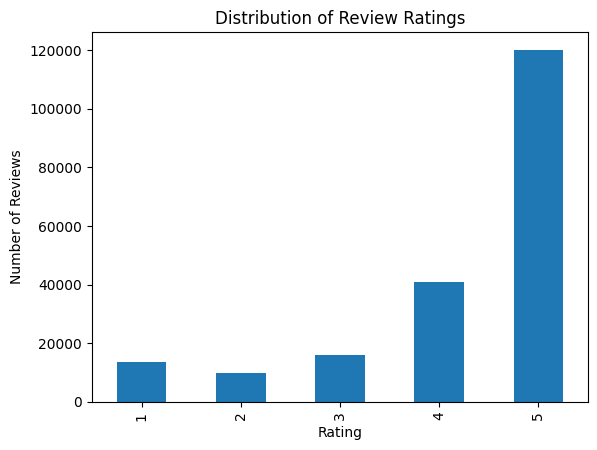

In [5]:
import matplotlib.pyplot as plt

df['overall'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [14]:
import re

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"http\S+|www\S+", "", t)
    t = re.sub(r"[^a-z\s]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

df[['reviewText','clean']].head(2)

,reviewText,clean
0,We got this GPS for my husband who is an (OTR)...,we got this gps for my husband who is an otr o...
1,"I'm a professional OTR truck driver, and I bou...",i m a professional otr truck driver and i boug...


In [15]:
df['tokens'] = df['clean'].apply(lambda x: x.split())
df[['clean', 'tokens']].head(2)

,clean,tokens
0,we got this gps for my husband who is an otr o...,"[we, got, this, gps, for, my, husband, who, is..."
1,i m a professional otr truck driver and i boug...,"[i, m, a, professional, otr, truck, driver, an..."


In [16]:
df['clean_joined'] = df['tokens'].apply(lambda x: " ".join(x))
df['clean_joined'].head(2)

,clean_joined
0,we got this gps for my husband who is an otr o...
1,i m a professional otr truck driver and i boug...


In [17]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['stemmed'] = df['tokens'].apply(
    lambda toks: [stemmer.stem(w) for w in toks]
)

df[['tokens','stemmed']].head(2)

,tokens,stemmed
0,"[we, got, this, gps, for, my, husband, who, is...","[we, got, thi, gp, for, my, husband, who, is, ..."
1,"[i, m, a, professional, otr, truck, driver, an...","[i, m, a, profession, otr, truck, driver, and,..."


In [18]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda toks: [lemm.lemmatize(w) for w in toks])
df[['tokens','lemmatized']].head(2)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,tokens,lemmatized
0,"[we, got, this, gps, for, my, husband, who, is...","[we, got, this, gps, for, my, husband, who, is..."
1,"[i, m, a, professional, otr, truck, driver, an...","[i, m, a, professional, otr, truck, driver, an..."


In [19]:
df['final_text'] = df['lemmatized'].apply(lambda x: " ".join(x))
df['final_text'].head(2)

,final_text
0,we got this gps for my husband who is an otr o...
1,i m a professional otr truck driver and i boug...


In [20]:
df[['tokens', 'stemmed', 'lemmatized']].head(2)

,tokens,stemmed,lemmatized
0,"[we, got, this, gps, for, my, husband, who, is...","[we, got, thi, gp, for, my, husband, who, is, ...","[we, got, this, gps, for, my, husband, who, is..."
1,"[i, m, a, professional, otr, truck, driver, an...","[i, m, a, profession, otr, truck, driver, and,...","[i, m, a, professional, otr, truck, driver, an..."


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['final_text'])

X_tfidf.shape

(200000, 5000)

In [22]:
import numpy as np
words = np.array(tfidf.get_feature_names_out())
top_idx = X_tfidf.sum(axis=0).A1.argsort()[-15:][::-1]
words[top_idx]

array(['the', 'it', 'to', 'and', 'is', 'this', 'for', 'of', 'my', 'you',
       'in', 'with', 'that', 'on', 'have'], dtype=object)

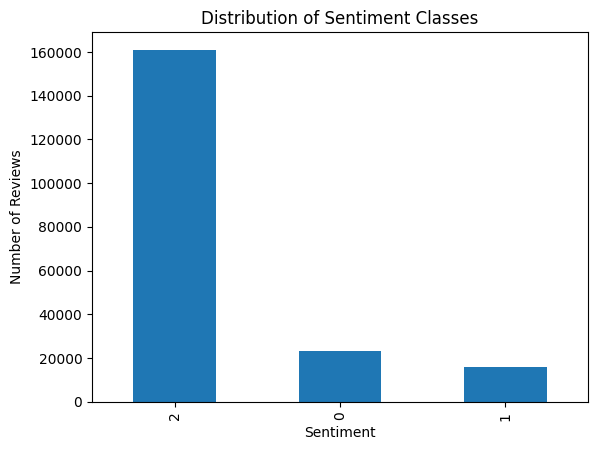

In [23]:
import matplotlib.pyplot as plt

def label_sentiment(r):
    if r <= 2:
        return 0
    elif r == 3:
        return 1
    else:
        return 2

df['sentiment'] = df['overall'].apply(label_sentiment)

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [24]:
df = df.dropna(subset=['final_text']).copy()
df['final_text'].head(2)

,final_text
0,we got this gps for my husband who is an otr o...
1,i m a professional otr truck driver and i boug...


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=5000)
X_bow = bow.fit_transform(df['final_text'])

X_bow.shape

(200000, 5000)

In [26]:
import numpy as np
words = np.array(bow.get_feature_names_out())
top_idx = X_bow.sum(axis=0).A1.argsort()[-15:][::-1]
words[top_idx]

array(['the', 'to', 'and', 'it', 'is', 'of', 'this', 'for', 'you', 'in',
       'that', 'my', 'with', 'on', 'have'], dtype=object)

In [27]:
ngram = CountVectorizer(ngram_range=(2,2), max_features=3000)  # bigrams
X_bigram = ngram.fit_transform(df['final_text'])

X_bigram.shape

(200000, 3000)

In [28]:
bigrams = np.array(ngram.get_feature_names_out())
top_idx = X_bigram.sum(axis=0).A1.argsort()[-15:][::-1]
bigrams[top_idx]

array(['of the', 'on the', 'if you', 'in the', 'it is', 'with the',
       'for the', 'to the', 'and the', 'this is', 'and it', 'you can',
       'to be', 'to use', 'have to'], dtype=object)

In [29]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

sample_tokens = df['tokens'].iloc[0]
nltk.pos_tag(sample_tokens[:30])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('we', 'PRP'),
 ('got', 'VBD'),
 ('this', 'DT'),
 ('gps', 'NN'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('husband', 'NN'),
 ('who', 'WP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('otr', 'NN'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('road', 'NN'),
 ('trucker', 'NN'),
 ('very', 'RB'),
 ('impressed', 'JJ'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('shipping', 'NN'),
 ('time', 'NN'),
 ('it', 'PRP'),
 ('arrived', 'VBD'),
 ('a', 'DT'),
 ('few', 'JJ'),
 ('days', 'NNS'),
 ('earlier', 'RB'),
 ('than', 'IN'),
 ('expected', 'VBN'),
 ('within', 'IN')]

In [30]:
from collections import Counter

pos_list = []
for toks in df['tokens'].head(2000):
    pos_list += [tag for _, tag in nltk.pos_tag(toks)]

Counter(pos_list).most_common(10)

[('NN', 45607),
 ('DT', 24620),
 ('IN', 24127),
 ('JJ', 20594),
 ('RB', 14577),
 ('VB', 10949),
 ('PRP', 10794),
 ('NNS', 10351),
 ('CC', 8955),
 ('VBP', 8774)]

In [31]:
def label_sentiment(r):
    if r <= 2:
        return 0
    elif r == 3:
        return 1
    else:
        return 2

df['sentiment'] = df['overall'].apply(label_sentiment)
df['sentiment'].value_counts()

,count
sentiment,
2,160949
0,23200
1,15851


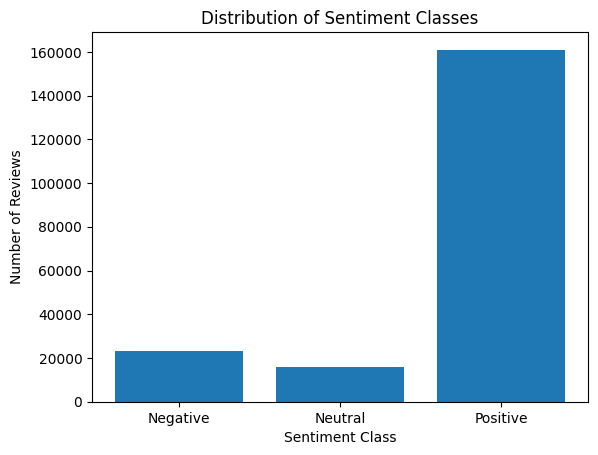

In [32]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts().sort_index()

plt.bar(
    ['Negative', 'Neutral', 'Positive'],
    sentiment_counts
)

plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Classes')
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

X = X_tfidf
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.8214

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['sentiment'], test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.85905
              precision    recall  f1-score   support

           0       0.70      0.58      0.64      4595
           1       0.41      0.09      0.15      3184
           2       0.89      0.97      0.93     32221

    accuracy                           0.86     40000
   macro avg       0.67      0.55      0.57     40000
weighted avg       0.83      0.86      0.83     40000



array([[ 2679,   198,  1718],
       [  546,   300,  2338],
       [  612,   226, 31383]])

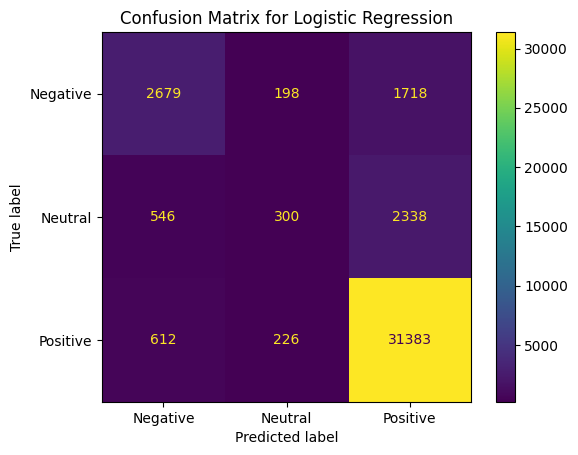

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred, # Changed from y_pred_lr to y_pred
    display_labels=["Negative", "Neutral", "Positive"]
)

plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)

X_bigrams = bigram_vectorizer.fit_transform(df['final_text'])


bigram_df = pd.DataFrame(
    X_bigrams.sum(axis=0),
    columns=bigram_vectorizer.get_feature_names_out()
).T

bigram_df.columns = ['Frequency']
bigram_df.sort_values(by='Frequency', ascending=False)


,Frequency
of the,83616
on the,59892
if you,57252
in the,56093
it is,50000
with the,47847
for the,45800
to the,45663
and the,45530
this is,42895


In [47]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk import word_tokenize, pos_tag

sample_review = df['final_text'].iloc[0]

tokens = word_tokenize(sample_review)
pos_tags = pos_tag(tokens)

pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[('we', 'PRP'),
 ('got', 'VBD'),
 ('this', 'DT'),
 ('gps', 'NN'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('husband', 'NN'),
 ('who', 'WP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('otr', 'NN'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('road', 'NN'),
 ('trucker', 'NN'),
 ('very', 'RB'),
 ('impressed', 'JJ'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('shipping', 'NN'),
 ('time', 'NN'),
 ('it', 'PRP'),
 ('arrived', 'VBD'),
 ('a', 'DT'),
 ('few', 'JJ'),
 ('day', 'NN'),
 ('earlier', 'RBR'),
 ('than', 'IN'),
 ('expected', 'VBN'),
 ('within', 'IN'),
 ('a', 'DT'),
 ('week', 'NN'),
 ('of', 'IN'),
 ('use', 'NN'),
 ('however', 'RB'),
 ('it', 'PRP'),
 ('started', 'VBD'),
 ('freezing', 'VBG'),
 ('up', 'RP'),
 ('could', 'MD'),
 ('of', 'IN'),
 ('just', 'RB'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('glitch', 'NN'),
 ('in', 'IN'),
 ('that', 'DT'),
 ('unit', 'NN'),
 ('worked', 'VBD'),
 ('great', 'JJ'),
 ('when', 'WRB'),
 ('it', 'PRP'),
 ('worked', 'VBD'),
 ('will', 'MD'),
 ('work', 'VB'),
 ('great', 'JJ'),
 ('for', 'IN'),
 ('the', '